In [32]:
%matplotlib notebook

In [33]:
#Step 1: Import the necessary libraries/dependencies
import pandas as pd
import numpy as np
from scipy.stats import pearsonr # for correlation analysis
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [35]:
#Step 2: Load Data

#Path and read in data to create DataFrame
happiness_df = pd.read_csv("Data/World Happiness Report.csv")
happiness_df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [36]:
#Step 3: Data Cleaning
# after running for 2022, realized there is NO DATA FOR 2022 . . . so using 2021
# Extract the desired columns from happiness_df
gdpconf_df = happiness_df.loc[happiness_df["Year"] == 2021,["Country Name","Log GDP Per Capita","Confidence In National Government"]]

In [37]:
gdpconf_df.head()

,Country Name,Log GDP Per Capita,Confidence In National Government
12,Afghanistan,7.324032,0.255620
27,Albania,9.583207,0.472924
38,Algeria,9.309262,NaN
58,Argentina,9.977073,0.326574
74,Armenia,9.560513,0.297146


In [38]:
#need to remove the NaNs
gdpconf_final_df = gdpconf_df.dropna()
gdpconf_final_df

,Country Name,Log GDP Per Capita,Confidence In National Government
12,Afghanistan,7.324032,0.255620
27,Albania,9.583207,0.472924
58,Argentina,9.977073,0.326574
74,Armenia,9.560513,0.297146
90,Australia,10.815255,0.519226
...,...,...,...
2086,United States,11.061464,0.404625
2103,Uruguay,10.034546,0.485831
2119,Uzbekistan,8.953489,0.912673
2181,Zambia,8.082337,0.697678


<IPython.core.display.Javascript object>


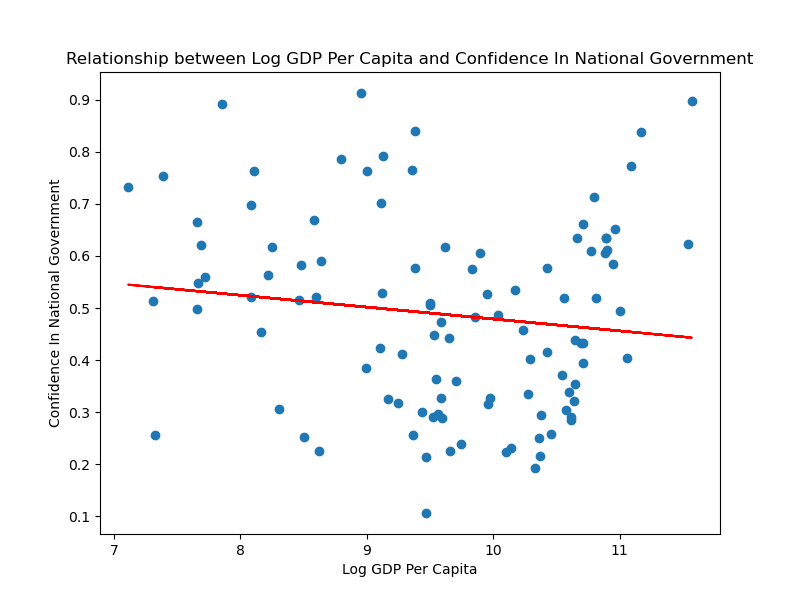

Text(0.5, 1.0, 'Relationship between Log GDP Per Capita and Confidence In National Government')

In [39]:
# Create a scatter plot to show the relationship between Log GDP Per Capita and Confidence in National Gov for all countries
plt.figure(figsize=(8, 6))
plt.scatter(gdpconf_final_df['Log GDP Per Capita'], gdpconf_final_df['Confidence In National Government'])
plt.xlabel('Log GDP Per Capita')
plt.ylabel('Confidence In National Government')
plt.title('Relationship between Log GDP Per Capita and Confidence In National Government')

In [40]:
# Perform linear regression on all data points
X = np.array(gdpconf_final_df['Log GDP Per Capita']).reshape((-1, 1))
y = np.array(gdpconf_final_df['Confidence In National Government'])
model = LinearRegression().fit(X, y)
y_pred = model.predict(X)
plt.plot(X, y_pred, color='red')

plt.show()

In [41]:
corr_coeff, p_value = pearsonr(gdpconf_final_df['Log GDP Per Capita'], gdpconf_final_df['Confidence In National Government'])

print(f"Pearson correlation coefficient: {corr_coeff:.2f}")
print(f"p-value: {p_value:.2f}")

Pearson correlation coefficient: -0.13
p-value: 0.17
